# Эксперименты с Random Forest и Gradient Boosting

**Датасет**: House Sales in King County, USA

**Цель**: Исследовать поведение собственных реализаций Random Forest и Gradient Boosting на реальных данных.

## Содержание
1. Загрузка и предобработка данных
2. Эксперименты с Random Forest
3. Эксперименты с Gradient Boosting
4. Сравнение результатов

In [41]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

from ensembles.random_forest import RandomForestMSE
from ensembles.boosting import GradientBoostingMSE

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
%matplotlib inline

In [42]:
# Загрузка данных
DATA_PATH = Path("../data/kc_house_data.csv")
df = pd.read_csv(DATA_PATH)

print(f"Размер датасета: {df.shape}")
print("Первые 5 строк:")
df.head()

Размер датасета: (21613, 21)
Первые 5 строк:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
# Информация о данных
print("Информация о столбцах:")
print(df.info())
print("Статистика:")
df.describe()

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-nu

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
# Предобработка данных

# Извлекаем признаки из даты
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

# Удаляем ненужные столбцы
df = df.drop(columns=["date", "id"])

# Разделяем на признаки и целевую переменную
target = df.pop("price")
X = df.copy()

# One-hot encoding для zipcode
X = pd.get_dummies(X, columns=["zipcode"], prefix="zip")

print(f"Размер признаков после предобработки: {X.shape}")
print(f"Целевая переменная (price): min={target.min():.0f}, max={target.max():.0f}, mean={target.mean():.0f}")

Размер признаков после предобработки: (21613, 90)
Целевая переменная (price): min=75000, max=7700000, mean=540088


In [45]:
# Разделение данных на train/validation/test

# Отделяем тестовую выборку (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    target,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Разделяем оставшиеся данные на train (64%) и validation (16%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Преобразуем в numpy массивы
X_train_np = X_train.values.astype(np.float64)
X_val_np = X_val.values.astype(np.float64)
X_test_np = X_test.values.astype(np.float64)
y_train_np = y_train.values.astype(np.float64)
y_val_np = y_val.values.astype(np.float64)
y_test_np = y_test.values.astype(np.float64)

print("Размеры выборок:")
print(f"Train: {X_train_np.shape[0]} объектов")
print(f"Validation: {X_val_np.shape[0]} объектов")
print(f"Test: {X_test_np.shape[0]} объектов")
print(f"Количество признаков: {X_train_np.shape[1]}")

Размеры выборок:
Train: 13832 объектов
Validation: 3458 объектов
Test: 4323 объектов
Количество признаков: 90


## 2. Эксперименты с Random Forest

### 2.1. Зависимость от количества деревьев

In [46]:
# Зависимость от количества деревьев
n_estimators_list = [5, 10, 20, 30, 50, 75, 100]
results_rf_n_trees = []

for n_trees in n_estimators_list:
    print(f"RF, n_estimators={n_trees}...", end=" ")
    
    rf = RandomForestMSE(
        n_estimators=n_trees,
        tree_params={
            "max_depth": 10,
            "random_state": 42
        }
    )
    
    start_time = time.time()
    rf.fit(X_train_np, y_train_np)
    train_time = time.time() - start_time
    
    y_pred_val = rf.predict(X_val_np)
    y_pred_test = rf.predict(X_test_np)
    
    rmse_val = np.sqrt(mean_squared_error(
        y_true=y_val_np,
        y_pred=y_pred_val
    ))
    rmse_test = np.sqrt(mean_squared_error(
        y_true=y_test_np,
        y_pred=y_pred_test
    ))

    results_rf_n_trees.append({
        "n_estimators": n_trees,
        "rmse_val": rmse_val,
        "rmse_test": rmse_test,
        "time": train_time
    })
    
    print(f"RMSE val={rmse_val:,.0f}, test={rmse_test:,.0f}, time={train_time:.2f}s")

df_rf_n_trees = pd.DataFrame(results_rf_n_trees)
df_rf_n_trees

RF, n_estimators=5... RMSE val=135,054, test=170,508, time=0.33s
RF, n_estimators=10... RMSE val=131,174, test=159,078, time=0.66s
RF, n_estimators=20... RMSE val=130,160, test=157,400, time=1.37s
RF, n_estimators=30... RMSE val=126,733, test=156,623, time=1.98s
RF, n_estimators=50... RMSE val=127,742, test=155,760, time=3.27s
RF, n_estimators=75... RMSE val=127,153, test=152,283, time=5.17s
RF, n_estimators=100... RMSE val=127,121, test=153,623, time=6.53s


,n_estimators,rmse_val,rmse_test,time
0,5,135054.243299,170507.839654,0.333781
1,10,131173.887632,159078.453553,0.658458
2,20,130159.761916,157400.305540,1.369021
3,30,126733.245644,156622.698877,1.976988
4,50,127742.411949,155759.963837,3.266570
5,75,127153.311797,152283.042885,5.167614
6,100,127121.058566,153622.844107,6.533793


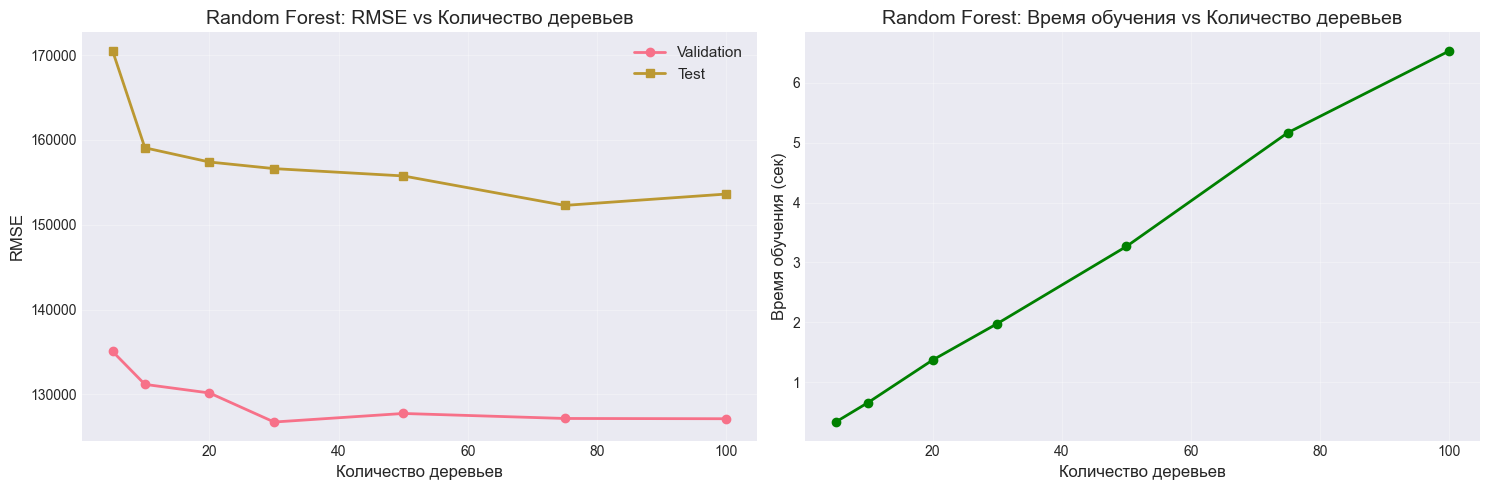

In [47]:
# Визуализация зависимости от количества деревьев
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(df_rf_n_trees['n_estimators'], df_rf_n_trees['rmse_val'], 'o-', label='Validation', linewidth=2)
axes[0].plot(df_rf_n_trees['n_estimators'], df_rf_n_trees['rmse_test'], 's-', label='Test', linewidth=2)
axes[0].set_xlabel('Количество деревьев', fontsize=12)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_title('Random Forest: RMSE vs Количество деревьев', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].plot(df_rf_n_trees['n_estimators'], df_rf_n_trees['time'], 'o-', color='green', linewidth=2)
axes[1].set_xlabel('Количество деревьев', fontsize=12)
axes[1].set_ylabel('Время обучения (сек)', fontsize=12)
axes[1].set_title('Random Forest: Время обучения vs Количество деревьев', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/rf_n_estimators.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/rf_n_estimators.svg', bbox_inches='tight')
plt.show()

### 2.2. Зависимость от max_features (размерность подвыборки признаков)

In [48]:
# Зависимость от max_features
n_features = X_train_np.shape[1]
max_features_list = [
    int(np.sqrt(n_features)),
    n_features // 4,
    n_features // 2,
    n_features
]
results_rf_max_features = []

for max_feat in max_features_list:
    print(f"RF, max_features={max_feat}...", end=" ")
    
    rf = RandomForestMSE(
        n_estimators=50,
        tree_params={
            "max_depth": 10,
            "max_features": max_feat,
            "random_state": 42
        }
    )
    
    start_time = time.time()
    rf.fit(X_train_np, y_train_np)
    train_time = time.time() - start_time
    
    y_pred_val = rf.predict(X_val_np)
    y_pred_test = rf.predict(X_test_np)
    
    rmse_val = np.sqrt(mean_squared_error(y_val_np, y_pred_val))
    rmse_test = np.sqrt(mean_squared_error(y_test_np, y_pred_test))
    
    results_rf_max_features.append({
        "max_features": max_feat,
        "max_features_ratio": max_feat / n_features,
        "rmse_val": rmse_val,
        "rmse_test": rmse_test,
        "time": train_time
    })
    
    print(f"RMSE val={rmse_val:,.0f}, test={rmse_test:,.0f}, time={train_time:.2f}s")

df_rf_max_features = pd.DataFrame(results_rf_max_features)
df_rf_max_features

RF, max_features=9... RMSE val=153,260, test=178,218, time=0.50s
RF, max_features=22... RMSE val=139,559, test=168,218, time=0.93s
RF, max_features=45... RMSE val=131,505, test=155,031, time=1.76s
RF, max_features=90... RMSE val=127,829, test=157,079, time=3.34s


,max_features,max_features_ratio,rmse_val,rmse_test,time
0,9,0.100000,153259.674683,178218.117405,0.503177
1,22,0.244444,139559.486407,168217.973342,0.932751
2,45,0.500000,131504.994734,155030.541595,1.758156
3,90,1.000000,127829.297659,157079.230888,3.340713


### 2.3. Зависимость от максимальной глубины дерева

In [49]:
# Зависимость от максимальной глубины (включая неограниченную)
max_depth_list = [3, 5, 10, 15, 20, None]
results_rf_max_depth = []

for max_d in max_depth_list:
    depth_str = str(max_d) if max_d is not None else "None"
    print(f"RF, max_depth={depth_str}...", end=" ")
    
    rf = RandomForestMSE(
        n_estimators=30,
        tree_params={"max_depth": max_d, "random_state": 42}
    )
    
    start_time = time.time()
    rf.fit(X_train_np, y_train_np)
    train_time = time.time() - start_time
    
    y_pred_val = rf.predict(X_val_np)
    y_pred_test = rf.predict(X_test_np)
    
    rmse_val = np.sqrt(mean_squared_error(
        y_true=y_val_np,
        y_pred=y_pred_val
    ))
    rmse_test = np.sqrt(mean_squared_error(
        y_true=y_test_np,
        y_pred=y_pred_test
    ))

    results_rf_max_depth.append({
        "max_depth": depth_str,
        "max_depth_num": max_d if max_d is not None else 999,
        "rmse_val": rmse_val,
        "rmse_test": rmse_test,
        "time": train_time
    })
    
    print(f"RMSE val={rmse_val:,.0f}, test={rmse_test:,.0f}, time={train_time:.2f}s")

df_rf_max_depth = pd.DataFrame(results_rf_max_depth)
df_rf_max_depth

RF, max_depth=3... RMSE val=205,498, test=230,660, time=0.70s
RF, max_depth=5... RMSE val=165,025, test=190,881, time=1.10s
RF, max_depth=10... RMSE val=127,954, test=160,027, time=1.97s
RF, max_depth=15... RMSE val=118,806, test=149,638, time=2.68s
RF, max_depth=20... RMSE val=122,617, test=150,265, time=3.11s
RF, max_depth=None... RMSE val=124,106, test=155,718, time=3.26s


,max_depth,max_depth_num,rmse_val,rmse_test,time
0,3,3,205498.329404,230659.765143,0.703177
1,5,5,165025.234830,190881.231933,1.103126
2,10,10,127953.628994,160027.044698,1.965026
3,15,15,118806.298566,149638.333816,2.682316
4,20,20,122617.146428,150264.828465,3.112807
5,None,999,124105.947533,155718.329885,3.262051


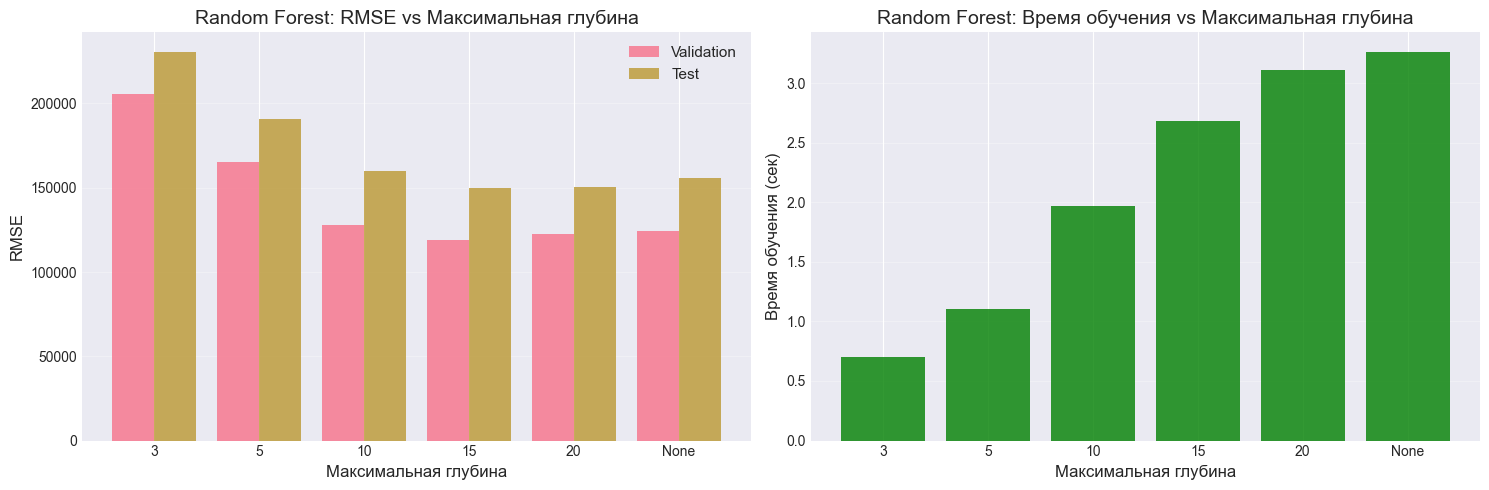

In [50]:
# Визуализация для max_depth
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

x_labels = df_rf_max_depth['max_depth'].values
x_pos = np.arange(len(x_labels))
axes[0].bar(x_pos - 0.2, df_rf_max_depth['rmse_val'], 0.4, label='Validation', alpha=0.8)
axes[0].bar(x_pos + 0.2, df_rf_max_depth['rmse_test'], 0.4, label='Test', alpha=0.8)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(x_labels, rotation=0)
axes[0].set_xlabel('Максимальная глубина', fontsize=12)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_title('Random Forest: RMSE vs Максимальная глубина', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x_pos, df_rf_max_depth['time'], color='green', alpha=0.8)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(x_labels, rotation=0)
axes[1].set_xlabel('Максимальная глубина', fontsize=12)
axes[1].set_ylabel('Время обучения (сек)', fontsize=12)
axes[1].set_title('Random Forest: Время обучения vs Максимальная глубина', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('plots/rf_max_depth.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/rf_max_depth.svg', bbox_inches='tight')
plt.show()

## 3. Эксперименты с Gradient Boosting

### 3.1. Зависимость от количества деревьев

In [51]:
# Зависимость от количества деревьев
n_estimators_gb_list = [10, 20, 30, 50, 75, 100, 150]
results_gb_n_trees = []

for n_trees in n_estimators_gb_list:
    print(f"GB, n_estimators={n_trees}...", end=" ")
    
    gb = GradientBoostingMSE(
        n_estimators=n_trees,
        tree_params={
            "max_depth": 3,
            "random_state": 42
        },
        learning_rate=0.1
    )
    
    start_time = time.time()
    gb.fit(X_train_np, y_train_np)
    train_time = time.time() - start_time
    
    y_pred_val = gb.predict(X_val_np)
    y_pred_test = gb.predict(X_test_np)
    
    rmse_val = np.sqrt(mean_squared_error(
        y_true=y_val_np,
        y_pred=y_pred_val
    ))
    rmse_test = np.sqrt(mean_squared_error(
        y_true=y_test_np,
        y_pred=y_pred_test
    ))
    
    results_gb_n_trees.append({
        "n_estimators": n_trees,
        "rmse_val": rmse_val,
        "rmse_test": rmse_test,
        "time": train_time
    })
    
    print(f"RMSE val={rmse_val:,.0f}, test={rmse_test:,.0f}, time={train_time:.2f}s")

df_gb_n_trees = pd.DataFrame(results_gb_n_trees)
df_gb_n_trees

GB, n_estimators=10... RMSE val=221,208, test=248,028, time=0.23s
GB, n_estimators=20... RMSE val=173,331, test=194,330, time=0.45s
GB, n_estimators=30... RMSE val=152,223, test=171,298, time=0.71s
GB, n_estimators=50... RMSE val=133,175, test=152,932, time=1.19s
GB, n_estimators=75... RMSE val=125,540, test=145,145, time=1.79s
GB, n_estimators=100... RMSE val=121,154, test=140,531, time=2.39s
GB, n_estimators=150... RMSE val=116,847, test=135,827, time=3.63s


,n_estimators,rmse_val,rmse_test,time
0,10,221207.938242,248028.172917,0.227927
1,20,173331.174219,194329.760515,0.453488
2,30,152222.500209,171297.866899,0.707260
3,50,133174.982754,152932.255486,1.188360
4,75,125540.190468,145145.403173,1.785798
5,100,121153.667334,140530.551260,2.392464
6,150,116847.334853,135827.457336,3.626162


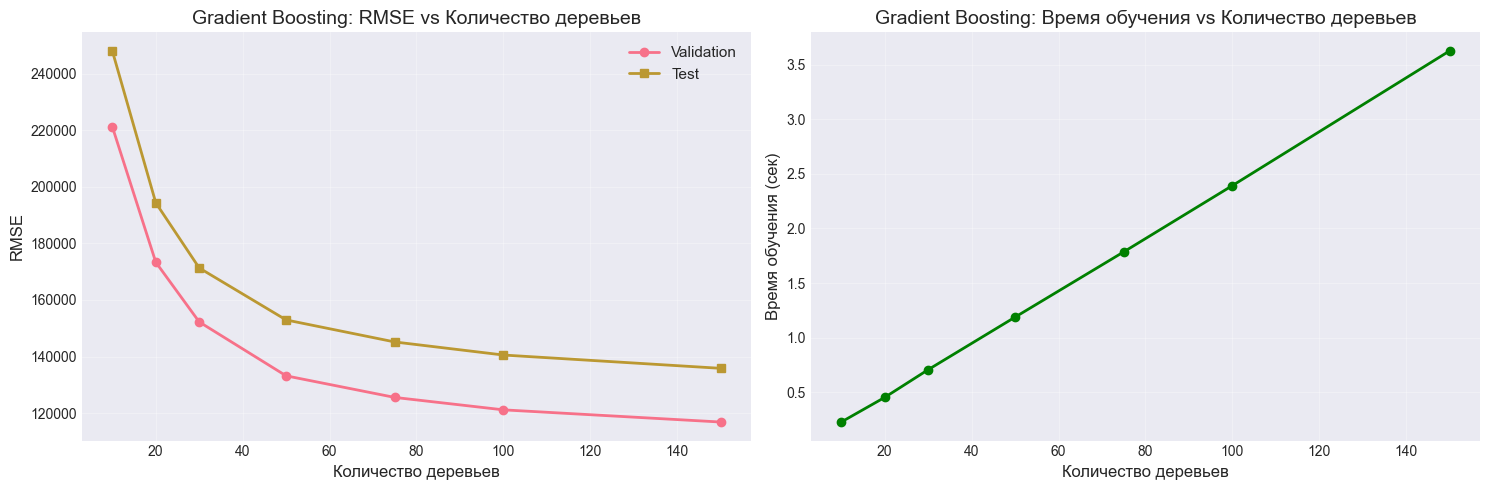

In [52]:
# Визуализация GB: количество деревьев
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(df_gb_n_trees['n_estimators'], df_gb_n_trees['rmse_val'], 'o-', label='Validation', linewidth=2)
axes[0].plot(df_gb_n_trees['n_estimators'], df_gb_n_trees['rmse_test'], 's-', label='Test', linewidth=2)
axes[0].set_xlabel('Количество деревьев', fontsize=12)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_title('Gradient Boosting: RMSE vs Количество деревьев', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].plot(df_gb_n_trees['n_estimators'], df_gb_n_trees['time'], 'o-', color='green', linewidth=2)
axes[1].set_xlabel('Количество деревьев', fontsize=12)
axes[1].set_ylabel('Время обучения (сек)', fontsize=12)
axes[1].set_title('Gradient Boosting: Время обучения vs Количество деревьев', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/gb_n_estimators.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/gb_n_estimators.svg', bbox_inches='tight')
plt.show()

### 3.2. Зависимость от max_features

In [53]:
# Зависимость от max_features
results_gb_max_features = []

for max_feat in max_features_list:
    print(f"GB, max_features={max_feat}...", end=" ")
    
    gb = GradientBoostingMSE(
        n_estimators=50,
        tree_params={
            "max_depth": 3,
            "max_features": max_feat,
            "random_state": 42
        },
        learning_rate=0.1
    )
    
    start_time = time.time()
    gb.fit(X_train_np, y_train_np)
    train_time = time.time() - start_time
    
    y_pred_val = gb.predict(X_val_np)
    y_pred_test = gb.predict(X_test_np)
    
    rmse_val = np.sqrt(mean_squared_error(
        y_true=y_val_np,
        y_pred=y_pred_val
    ))
    rmse_test = np.sqrt(mean_squared_error(
        y_true=y_test_np,
        y_pred=y_pred_test
    ))

    results_gb_max_features.append({
        "max_features": max_feat,
        "max_features_ratio": max_feat / n_features,
        "rmse_val": rmse_val,
        "rmse_test": rmse_test,
        "time": train_time
    })
    
    print(f"RMSE val={rmse_val:,.0f}, test={rmse_test:,.0f}, time={train_time:.2f}s")

df_gb_max_features = pd.DataFrame(results_gb_max_features)
df_gb_max_features

GB, max_features=9... RMSE val=185,700, test=214,148, time=0.20s
GB, max_features=22... RMSE val=176,886, test=197,835, time=0.28s
GB, max_features=45... RMSE val=142,736, test=163,873, time=0.62s
GB, max_features=90... RMSE val=133,175, test=152,932, time=1.19s


,max_features,max_features_ratio,rmse_val,rmse_test,time
0,9,0.100000,185700.055561,214147.639469,0.196488
1,22,0.244444,176885.555356,197835.356229,0.280116
2,45,0.500000,142735.756313,163872.690881,0.618046
3,90,1.000000,133174.982754,152932.255486,1.185299


### 3.3. Зависимость от максимальной глубины

In [54]:
# Зависимость от максимальной глубины (включая неограниченную)
max_depth_gb_list = [2, 3, 5, 7, 10, None]
results_gb_max_depth = []

for max_d in max_depth_gb_list:
    depth_str = str(max_d) if max_d is not None else "None"
    print(f"GB, max_depth={depth_str}...", end=" ")
    
    gb = GradientBoostingMSE(
        n_estimators=50,
        tree_params={
            "max_depth": max_d,
            "random_state": 42
        },
        learning_rate=0.1
    )
    
    start_time = time.time()
    gb.fit(X_train_np, y_train_np)
    train_time = time.time() - start_time
    
    y_pred_val = gb.predict(X_val_np)
    y_pred_test = gb.predict(X_test_np)
    
    rmse_val = np.sqrt(mean_squared_error(
        y_true=y_val_np,
        y_pred=y_pred_val
    ))
    rmse_test = np.sqrt(mean_squared_error(
        y_true=y_test_np,
        y_pred=y_pred_test
    ))
    
    results_gb_max_depth.append({
        "max_depth": depth_str,
        "max_depth_num": max_d if max_d is not None else 999,
        "rmse_val": rmse_val,
        "rmse_test": rmse_test,
        "time": train_time
    })
    
    print(f"RMSE val={rmse_val:,.0f}, test={rmse_test:,.0f}, time={train_time:.2f}s")

df_gb_max_depth = pd.DataFrame(results_gb_max_depth)
df_gb_max_depth

GB, max_depth=2... RMSE val=155,082, test=181,875, time=0.81s
GB, max_depth=3... RMSE val=133,175, test=152,932, time=1.17s
GB, max_depth=5... RMSE val=116,550, test=145,765, time=1.89s
GB, max_depth=7... RMSE val=115,900, test=139,932, time=2.60s
GB, max_depth=10... RMSE val=116,442, test=146,441, time=3.71s
GB, max_depth=None... RMSE val=161,434, test=198,069, time=6.71s


,max_depth,max_depth_num,rmse_val,rmse_test,time
0,2,2,155082.179620,181875.073923,0.811651
1,3,3,133174.982754,152932.255486,1.173408
2,5,5,116549.552383,145764.608875,1.894390
3,7,7,115900.359326,139931.799112,2.597664
4,10,10,116441.549747,146440.821381,3.712592
5,None,999,161433.586409,198069.172842,6.709250


### 3.4. Зависимость от learning_rate

In [55]:
# Зависимость от learning_rate
learning_rate_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
results_gb_lr = []

for lr in learning_rate_list:
    print(f"GB, learning_rate={lr}...", end=" ")
    
    gb = GradientBoostingMSE(
        n_estimators=50,
        tree_params={
            "max_depth": 3,
            "random_state": 42
        },
        learning_rate=lr
    )
    
    start_time = time.time()
    gb.fit(X_train_np, y_train_np)
    train_time = time.time() - start_time
    
    y_pred_val = gb.predict(X_val_np)
    y_pred_test = gb.predict(X_test_np)
    
    rmse_val = np.sqrt(mean_squared_error(
        y_true=y_val_np,
        y_pred=y_pred_val
    ))
    rmse_test = np.sqrt(mean_squared_error(
        y_true=y_test_np,
        y_pred=y_pred_test
    ))
    
    results_gb_lr.append({
        "learning_rate": lr,
        "rmse_val": rmse_val,
        "rmse_test": rmse_test,
        "time": train_time
    })
    
    print(f"RMSE val={rmse_val:,.0f}, test={rmse_test:,.0f}, time={train_time:.2f}s")

df_gb_lr = pd.DataFrame(results_gb_lr)
df_gb_lr

GB, learning_rate=0.01... RMSE val=268,341, test=301,634, time=1.19s
GB, learning_rate=0.05... RMSE val=161,282, test=182,117, time=1.14s
GB, learning_rate=0.1... RMSE val=133,175, test=152,932, time=1.15s
GB, learning_rate=0.2... RMSE val=123,159, test=144,301, time=1.14s
GB, learning_rate=0.3... RMSE val=119,960, test=150,495, time=1.16s
GB, learning_rate=0.5... RMSE val=128,727, test=149,342, time=1.15s


,learning_rate,rmse_val,rmse_test,time
0,0.01,268340.664067,301634.025020,1.191077
1,0.05,161282.255329,182117.130710,1.144204
2,0.10,133174.982754,152932.255486,1.151791
3,0.20,123159.437315,144301.269391,1.144331
4,0.30,119960.396428,150495.159516,1.161833
5,0.50,128726.655098,149341.673648,1.152094


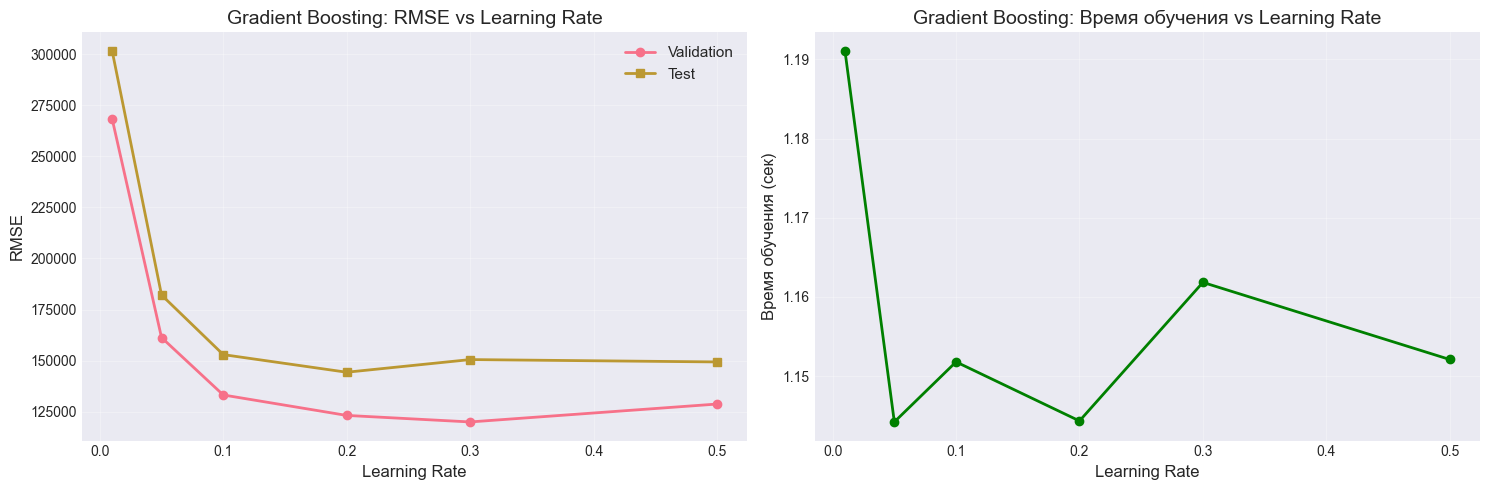

In [56]:
# Визуализация для learning_rate
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(df_gb_lr['learning_rate'], df_gb_lr['rmse_val'], 'o-', label='Validation', linewidth=2)
axes[0].plot(df_gb_lr['learning_rate'], df_gb_lr['rmse_test'], 's-', label='Test', linewidth=2)
axes[0].set_xlabel('Learning Rate', fontsize=12)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_title('Gradient Boosting: RMSE vs Learning Rate', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].plot(df_gb_lr['learning_rate'], df_gb_lr['time'], 'o-', color='green', linewidth=2)
axes[1].set_xlabel('Learning Rate', fontsize=12)
axes[1].set_ylabel('Время обучения (сек)', fontsize=12)
axes[1].set_title('Gradient Boosting: Время обучения vs Learning Rate', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/gb_learning_rate.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/gb_learning_rate.svg', bbox_inches='tight')
plt.show()

## 4. Итоговое сравнение и выводы

In [57]:
# Лучшие модели на основе экспериментов

# Random Forest с лучшей конфигурацией
rf_best = RandomForestMSE(
    n_estimators=75,
    tree_params={"max_depth": 15, "random_state": 42}
)

start = time.time()
rf_best.fit(X_train_np, y_train_np)
rf_train_time = time.time() - start

y_pred_rf = rf_best.predict(X_test_np)
rmse_rf = np.sqrt(mean_squared_error(y_test_np, y_pred_rf))

# Gradient Boosting с лучшей конфигурацией
gb_best = GradientBoostingMSE(
    n_estimators=100,
    tree_params={
        "max_depth": 5,
        "random_state": 42
    },
    learning_rate=0.1
)

start = time.time()
gb_best.fit(X_train_np, y_train_np)
gb_train_time = time.time() - start

y_pred_gb = gb_best.predict(X_test_np)
rmse_gb = np.sqrt(mean_squared_error(
    y_true=y_test_np,
    y_pred=y_pred_gb
))

# Сравнительная таблица
comparison = pd.DataFrame({
    "Модель": ["Random Forest", "Gradient Boosting"],
    "RMSE (test)": [rmse_rf, rmse_gb],
    "Время обучения (сек)": [rf_train_time, gb_train_time]
})

print("Итоговое сравнение моделей:")
print(comparison.to_string(index=False))

Итоговое сравнение моделей:
           Модель   RMSE (test)  Время обучения (сек)
    Random Forest 146369.546235              6.885040
Gradient Boosting 141838.125776              3.882184


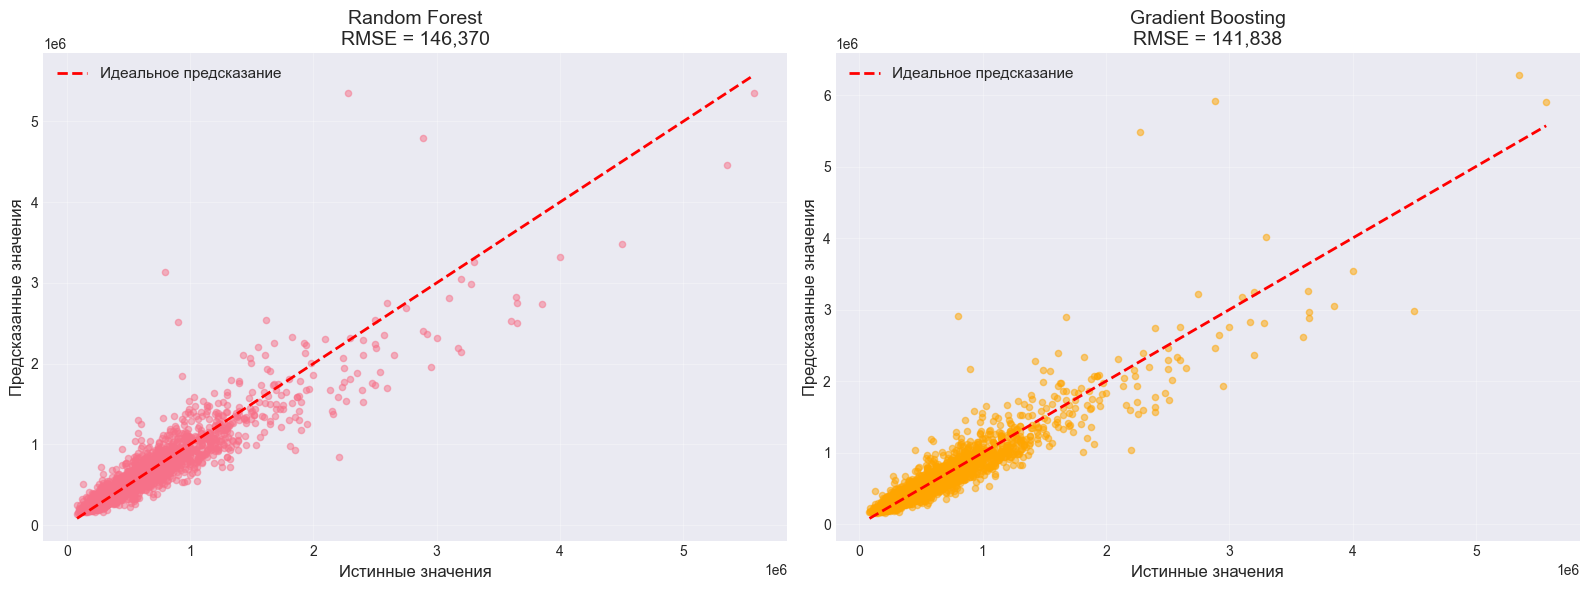

In [58]:
# Финальная визуализация: сравнение предсказаний
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(y_test_np, y_pred_rf, alpha=0.5, s=20)
axes[0].plot(
    [y_test_np.min(), y_test_np.max()],
    [y_test_np.min(), y_test_np.max()], 
    'r--',
    lw=2,
    label='Идеальное предсказание'
)
axes[0].set_xlabel('Истинные значения', fontsize=12)
axes[0].set_ylabel('Предсказанные значения', fontsize=12)
axes[0].set_title(f'Random Forest\nRMSE = {rmse_rf:,.0f}', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_test_np, y_pred_gb, alpha=0.5, s=20, color='orange')
axes[1].plot(
    [y_test_np.min(), y_test_np.max()],
    [y_test_np.min(), y_test_np.max()],
    'r--',
    lw=2,
    label='Идеальное предсказание'
)
axes[1].set_xlabel('Истинные значения', fontsize=12)
axes[1].set_ylabel('Предсказанные значения', fontsize=12)
axes[1].set_title(f'Gradient Boosting\nRMSE = {rmse_gb:,.0f}', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/comparison_predictions.png', dpi=300, bbox_inches='tight')
plt.savefig('plots/comparison_predictions.svg', bbox_inches='tight')
plt.show()

In [59]:
print("""Выводы из экспериментов:

Random Forest:
- Увеличение количества деревьев улучшает качество, но рост замедляется после 50-75 деревьев
- Оптимальная глубина деревьев: 10-15
- Время обучения растёт линейно с количеством деревьев
- Неограниченная глубина приводит к переобучению

Gradient Boosting:
- Более чувствителен к количеству деревьев - качество продолжает улучшаться дольше
- Оптимальная глубина базовых деревьев: 3-5
- Learning rate 0.1 обеспечивает хороший баланс между качеством и скоростью
- Слишком большой learning_rate (>0.3) ухудшает качество

Сравнение:
- Gradient Boosting обычно показывает лучшее качество при правильной настройке
- Random Forest быстрее обучается и менее чувствителен к гиперпараметрам
""")

Выводы из экспериментов:

Random Forest:
- Увеличение количества деревьев улучшает качество, но рост замедляется после 50-75 деревьев
- Оптимальная глубина деревьев: 10-15
- Время обучения растёт линейно с количеством деревьев
- Неограниченная глубина приводит к переобучению

Gradient Boosting:
- Более чувствителен к количеству деревьев - качество продолжает улучшаться дольше
- Оптимальная глубина базовых деревьев: 3-5
- Learning rate 0.1 обеспечивает хороший баланс между качеством и скоростью
- Слишком большой learning_rate (>0.3) ухудшает качество

Сравнение:
- Gradient Boosting обычно показывает лучшее качество при правильной настройке
- Random Forest быстрее обучается и менее чувствителен к гиперпараметрам

